In [1]:
import os, pickle, time
import numpy as np
import healpy as hp
from beamconv import ScanStrategy, tools
import matplotlib.pyplot as plt
import qpoint as qp
import seaborn as sns
sns.set()
%matplotlib inline

We define a scan strategy to be able to access the function we are interested in, instr_modulation. Since we are interested in the effects of HWP rotation, we also define a $2\pi$ rotation of the HWP. Nothe that we need a position angle (pa) vector of the same size.

In [2]:
ss = ScanStrategy(1000/100., # mission duration in sec.                                  
                  sample_rate=100, # 10 Hz sample rate                                    
                  location='spole') # South pole instrument  
hwp_ang = np.arange(0, 2*np.pi, np.pi/50)
pa_ang = np.zeros(hwp_ang.size)
pol_ang = np.arange(0, 180,1)


We also create a beam, since the function demands it as an argument. Once again, the function is not really using it at the moment.

In [7]:
# create Beam 
beam_opts = dict(lmax=700,
                 fwhm=40,       # Gaussian co-pol beam, so only specify FWHM (arcmin)
                 btype='Gaussian')
ss.create_focal_plane(nrow=3, ncol=3, fov=3, no_pairs=True,
                      **beam_opts)
beam_dummy = ss.beams[0][0]
print(beam_dummy)

name    : r000c000A 
btype   : Gaussian 
alive   : True 
FWHM    : 40 arcmin 
az      : -1.5 deg 
el      : -1.5 deg 
polang  : 0.0 deg
po_file : None 



We now create real and complex tod vectors. They are constant and of size hwp_ang, since we wish to examine the effect of the HWP's rotation. The tod_c is set at a thousandth of the tod amplitude. Note that the computed exit amplitude is established for a 

In [10]:
tod =np.ones(hwp_ang.size)*1.0
tod_c = np.ones(hwp_ang.size)*(1+1.0j)*0.001
nideal = np.real(ss.scan(beam_dummy, start=0, end=1))

AttributeError: 'ScanStrategy' object has no attribute 'spinmaps'

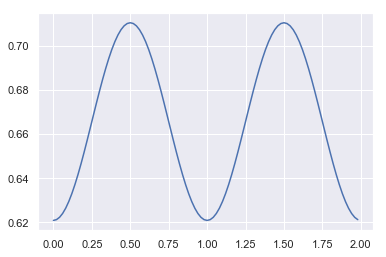

In [21]:

plt.plot(hwp_ang/np.pi, nideal, 'b')

plt.show()

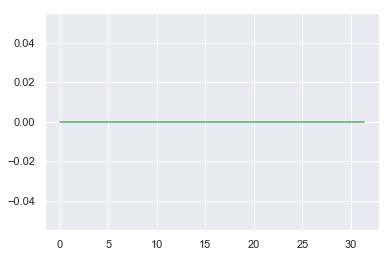

0.0
